### Import needed packages


In [1]:
import matplotlib.pyplot as plt #add to the workspace
import pandas as pd #import dataset, dealing with data
import pylab as pl
import numpy as np #mathematical operations
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

Understanding the data

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head() #read the dataset

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [3]:
df.TRANSMISSION

0       A4
1       M5
2      AS5
3       A4
4       A4
      ... 
634     A4
635     A4
636     A4
637     M5
638     A5
Name: TRANSMISSION, Length: 639, dtype: object

In [4]:
df.MAKE

0      ACURA
1      ACURA
2      ACURA
3      ACURA
4      ACURA
       ...  
634    VOLVO
635    VOLVO
636    VOLVO
637    VOLVO
638    VOLVO
Name: MAKE, Length: 639, dtype: object

In [5]:
df.describe() #summarize the data -work on numerical columns

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [6]:
cdf = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']] #list columns ,use square bracket
cdf.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


Plot a histogram

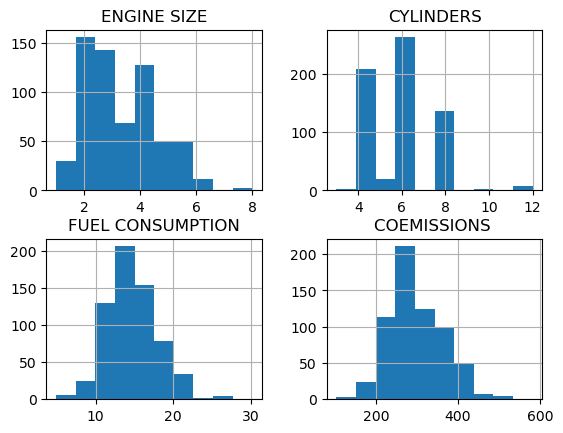

In [7]:
viz = cdf[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
viz.hist()
plt.show()

Plot each of these  features against the emission, to see how linear their relationship is: 

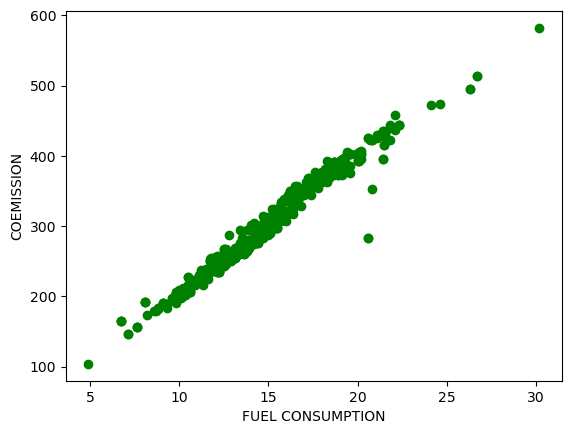

In [8]:
plt.scatter(cdf['FUEL CONSUMPTION'], cdf['COEMISSIONS '], color= 'green')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("COEMISSION")
plt.show()

There is a high correlation between fuel consumption and coemission

Regression

In [9]:
msk =np.random.rand(len(df)) <0.8

In [10]:
msk

array([False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
count = 0
for a in range(len(msk)):
    if (msk[a] == True):
        count = count + 1
print(count)            

501


In [12]:
train = cdf[msk] #80% of the records
test = cdf[~msk] #20% of the records

Simple Regression model
y = mx + c
m= gradient: co-effient
c= constant: y - intercept

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINE SIZE']])
train_y = np.asanyarray(train[['COEMISSIONS ']])

regr.fit(train_x, train_y) # train the model
# The coefficients
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)


Coefficients: [[44.76067304]]
Intercept: [150.02312213]


coefficient and intercept in simple linear regression, are the parameters of the fit line

Text(0, 0.5, 'Emission')

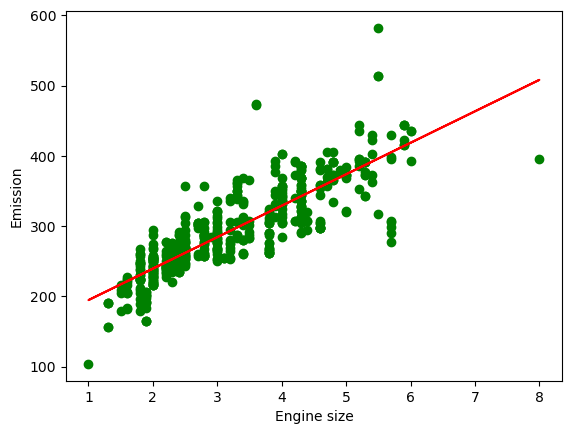

In [14]:
plt.scatter(train['ENGINE SIZE'], train['COEMISSIONS '],  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [15]:
regr.coef_[0][0]*2 + regr.intercept_[0]

239.54446820696955

### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).



In [23]:
from sklearn.metrics import r2_score

# Assuming test_y_actual contains the actual values from the test set
test_y_actual = np.asanyarray(test[['COEMISSIONS ']])

# Predict the values using your model
test_y_pred = regr.predict(test_x)

# Calculate and print the metrics
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_actual - test_y_pred)))
print("Residual/root sum of square (MSE): %.2f" % np.mean((test_y_actual - test_y_pred) ** 2))
print("R2-score: %.2f" % r2_score(test_y_actual, test_y_pred))


Mean absolute error: 26.58
Residual/root sum of square (MSE): 1241.30
R2-score: 0.76
